使用するモジュールのimport

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
# import japanize_matplotlib
import pandas as pd
from pandas import DataFrame

## 特性値の活用

### データの中心を表す特性値

#### 算術平均

In [2]:
# アヤメデータの読み込み
Iris = pd.read_csv('material/sec_2-1/Iris.csv')
Iris = Iris.iloc[:, 1:5]

FileNotFoundError: [Errno 2] No such file or directory: 'material/sec_2-1/Iris.csv'

In [4]:
Iris.columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [5]:
# ビンの個数（スタージェスの公式）
BN = int(1+np.log2(len(Iris)))

In [9]:
# がく片の長さに対する度数分布表
f, x = np.histogram(Iris['Sepal Length'], bins=BN, density=0)
df = DataFrame(np.c_[x[:-1], x[1:], 0.5*(x[1:]+x[:-1]), f, 100*f/len(Iris), 100*np.cumsum(f/len(Iris))],
          columns=['最小', '最大', '階級値', '度数', '相対度数', '累積相対度数'])
# df.to_csv('material/sec_2-1/fdt.csv', index=False, encoding="shift-jis")
df

,最小,最大,階級値,度数,相対度数,累積相対度数
0,4.30,4.75,4.53,11.0,7.33,7.33
1,4.75,5.20,4.97,30.0,20.00,27.33
2,5.20,5.65,5.43,24.0,16.00,43.33
3,5.65,6.10,5.88,24.0,16.00,59.33
4,6.10,6.55,6.33,31.0,20.67,80.00
5,6.55,7.00,6.78,17.0,11.33,91.33
6,7.00,7.45,7.22,7.0,4.67,96.00
7,7.45,7.90,7.68,6.0,4.00,100.00


Text(0, 0.5, 'Frequency')

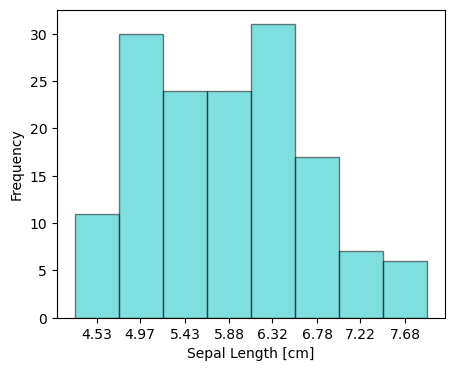

In [10]:
# ヒストグラムの描画と保存
fig, ax = plt.subplots(figsize=(5, 4))
x = ax.hist(Iris['Sepal Length'], bins=BN, histtype='bar', color='c', ec='k', alpha=0.5)[1]
x2 = np.round(0.5*(x[1:]+x[:-1]), 2)  # 横軸に表示する階級値を計算（中央値）

ax.set_xticks(x2)  
ax.set_xlabel('Sepal Length [cm]')
ax.set_ylabel('Frequency')

In [11]:
# アヤメのがく片の長さの平均
Iris['Sepal Length'].mean()

5.843333333333335

In [12]:
# アヤメのがく片の長さの平均（度数分布表から求めたもの）
np.sum(df['度数']*df['階級値'])/np.sum(df['度数'])

5.854

#### 幾何平均

In [13]:
from scipy.stats.mstats import gmean

In [14]:
gmean(Iris['Sepal Length'])

5.785720390427728

#### 中央値

In [ ]:
Iris['Sepal Length'].median()

5.8

#### 最頻値

In [ ]:
Iris['Sepal Length'].mode()

0    5.0
dtype: float64

### データのばらつきを表す特性値

#### 平均偏差

In [ ]:
np.fabs(Iris['Sepal Length'] - Iris['Sepal Length'].mean()).mean()

0.6875555555555561

#### 分散・標準偏差

In [ ]:
# 分散
Iris['Sepal Length'].var()

0.6856935123042505

In [ ]:
# 標準偏差
Iris['Sepal Length'].std()

0.8280661279778629

#### 変動係数

In [ ]:
Iris['Sepal Length'].std()/Iris['Sepal Length'].mean()

0.1417112597794403

### ローレンツ曲線とジニ係数

In [5]:
x = np.array([25, 25, 25, 25])
X = np.cumsum(x) / np.sum(x)
y = np.array([15, 25, 40, 80])
Y = np.cumsum(y) / np.sum(y)

In [6]:
DataFrame(np.c_[x, X, y, Y],
          columns=['サイズ', 'サイズの累積相対度数', '平均所得', '所得の累積相対度数'])

,サイズ,サイズの累積相対度数,平均所得,所得の累積相対度数
0,25.0,0.25,15.0,0.09
1,25.0,0.50,25.0,0.25
2,25.0,0.75,40.0,0.50
3,25.0,1.00,80.0,1.00


#### ローレンツ曲線

In [7]:
X2 = np.append(0, X)
Y2 = np.append(0, Y)

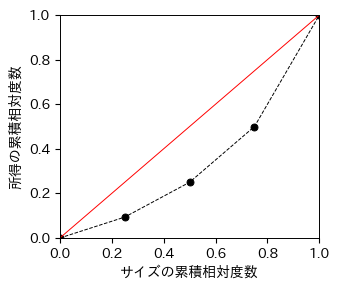

In [8]:
fig, ax = plt.subplots()

ax.plot(X2, Y2, 'o--')
ax.plot([0, 1], [0, 1], '-')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(u'サイズの累積相対度数')
ax.set_ylabel(u'所得の累積相対度数')
fig.savefig('./figure/lorentz.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300)

#### ジニ係数

面積から求める

In [ ]:
S1 = 0.5  # 完全平等選，x軸，y軸で囲まれた三角形の面積
S2 = 0    # ローレンツ曲線，x軸，y軸で囲まれた面積
for (a, b, h) in zip(Y2[:-1], Y2[1:], np.diff(X2)):
    S2 += (a+b)*h/2
G = (S1 - S2) / S1

In [ ]:
G

0.328125

公式から求める
$$ G = \frac{1}{2n^{2} \bar{y}} \sum_{i=1}^{n} \sum_{j=1}^{n} |y_{i} - y_{j}| $$

In [ ]:
G = np.fabs(np.add.outer(y, -y)).sum() / np.mean(y) / 2 / len(y)**2
G

0.328125

### 実例：地域の豊かさの格差は拡大しているか？

#### STEP1: Problem

- 2015年の国勢調査では，日本全体の人口が1920年の調査開始以来，初めて減少したことが明らかになった．
- また，都道府県ごとの人口を見ても，5年前（2010年）に比べて人口が減少したのは39の道府県にのぼる．
- 一方，東京を中心とした大都市には人口が集中し，都市部と地方の格差が広がっているのも事実である．
- 人口は経済・社会の基盤を成すものであり，人口の増減は経済的な豊かさと密接に関わっていると思われる．
- 近年の人口変動によって，地域間で経済的な豊かさの格差は拡大したのだろうか？

#### STEP2: Plan

- 地域ごとの経済的な豊かさを捉える指標として，都道府県別の1人当たり県民所得に着目する．
- これは，企業を含めて県民全体の経済水準を表すもので，都道府県間で比較可能な統計データである．
- ただし，各都道府県は人口規模が大きく異るので，地域ごとに比較する際は規模を表す人口等の変数で除した量を用いることが必要となる．
- そこで，今回用いる1人当たり県民所得は，県民所得を県内に居住する人口（「国勢調査」と「人口推計」に準拠）で除して求める．
- また，格差の大きさは一人当たり県民所得の標準偏差，変動係数，ジニ係数で評価し，ばらつきが40年間で拡大しているか否かを調べる．

#### STEP3: Data

- 1人当たり県民所得は，内閣府「県民経済計算」(https://www.esri.cao.go.jp/jp/sna/data/data_list/kenmin/files/files_kenmin.html) から利用することができる．
- ただし，年度が同じでも基準（平成23年基準や平成17年基準など）によって算出された値が異なることに注意する．

In [9]:
PI = pd.read_csv('material/sec_2-2/prefectural_income.csv', index_col='p')
PI.columns = PI.columns.astype(int)
PI = np.round(PI/10, 0)  # 単位を万円に変換

In [10]:
PI

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
p,,,,,,,,,,,,,,,,,,,,,
hokkaido,106.0,120.0,135.0,146.0,159.0,156.0,162.0,171.0,169.0,179.0,...,237.0,240.0,241.0,240.0,246.0,251.0,261.0,262.0,269.0,274.0
aomori,85.0,93.0,102.0,114.0,122.0,127.0,137.0,141.0,141.0,152.0,...,237.0,228.0,235.0,237.0,238.0,240.0,254.0,257.0,251.0,251.0
iwate,84.0,92.0,106.0,120.0,126.0,130.0,138.0,142.0,150.0,159.0,...,221.0,227.0,231.0,243.0,256.0,259.0,267.0,268.0,278.0,284.0
miyagi,102.0,111.0,124.0,135.0,142.0,153.0,162.0,168.0,175.0,183.0,...,248.0,239.0,242.0,258.0,265.0,276.0,292.0,289.0,294.0,294.0
akita,93.0,103.0,115.0,122.0,127.0,142.0,144.0,150.0,155.0,165.0,...,236.0,226.0,231.0,231.0,238.0,240.0,249.0,256.0,270.0,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kumamoto,94.0,105.0,115.0,125.0,134.0,145.0,152.0,157.0,165.0,174.0,...,218.0,224.0,229.0,229.0,235.0,235.0,242.0,253.0,265.0,267.0
oita,87.0,97.0,110.0,122.0,130.0,140.0,146.0,150.0,159.0,168.0,...,229.0,245.0,240.0,239.0,240.0,246.0,261.0,259.0,269.0,271.0
miyazaki,82.0,90.0,102.0,114.0,120.0,127.0,134.0,140.0,139.0,147.0,...,207.0,214.0,215.0,215.0,225.0,224.0,232.0,239.0,245.0,247.0


#### STEP4: Analysis

##### 実習：平均と標準偏差
- 各年度に対して平均と標準偏差を求めよ．
- 1975年〜91年の標準偏差は一貫して増加しており，格差は拡大しているように見えるが，本当にそう言えるか？平均値の変化と関連付けて考えよ．

Text(0, 0.5, '標準偏差（万円）')

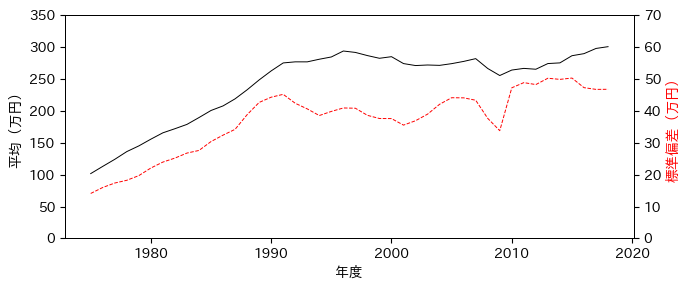

In [11]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xlabel('年度')

# 1人あたり県民所得の平均
ax.plot(PI.columns, PI.mean())
ax.set_ylim(0, 350)
ax.set_ylabel('平均（万円）')

# 1人あたり県民所得の標準偏差
ax2 = ax.twinx()
ax2.plot(PI.columns, PI.std(), 'r--')
ax2.set_ylim(0, 70)
ax2.set_ylabel('標準偏差（万円）', color='r')

##### 実習：変動係数
- 全年度に対して変動係数を求め，時系列変化を可視化せよ．
- 変動係数の変化から，1975年〜91年および全期間にかけて格差が増加しているか考えよ．

Text(0, 0.5, '変動係数')

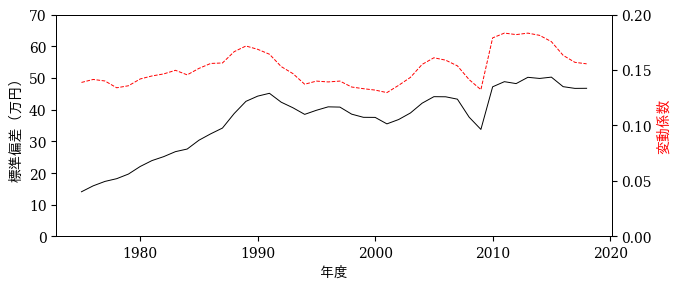

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xlabel('年度', fontname='IPAexGothic')

# 1人あたり県民所得の標準偏差
ax.plot(PI.columns, PI.std(), 'k-')
ax.set_ylim(0, 70)
ax.set_ylabel('標準偏差（万円）', fontname='IPAexGothic')

# 1人あたり県民所得の変動係数
ax2 = ax.twinx()
ax2.plot(PI.columns, PI.std()/PI.mean(), 'r--')
ax2.set_ylim(0, 0.2)
ax2.set_ylabel('変動係数', fontname='IPAexGothic', color='r')

##### 実習：ローレンツ曲線，ジニ係数
- 年度を１つ選び，その年度のローレンツ曲線とジニ係数を求めよ．
- 全年度に対してジニ係数を求め，時系列変化を可視化せよ．
- ジニ係数の変化から，1975年〜91年および全期間にかけて格差が増加しているか考えよ．

2013年度のローレンツ曲線

In [12]:
x = np.ones(47)
X = np.cumsum(x) / np.sum(x)
y = np.sort(PI[2013])
Y = np.cumsum(y) / np.sum(y)
X2 = np.append(0, X)
Y2 = np.append(0, Y)

Text(0, 0.5, '所得の累積相対度数')

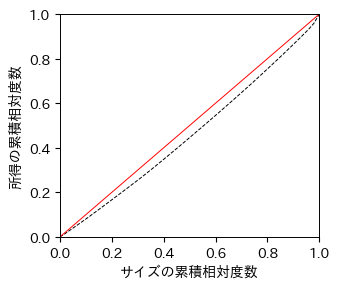

In [13]:
fig, ax = plt.subplots()

ax.plot(X2, Y2, '--')
ax.plot([0, 1], [0, 1], '-')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(u'サイズの累積相対度数')
ax.set_ylabel(u'所得の累積相対度数')

ジニ係数の時間変化

In [15]:
G = []
for t in PI.columns:
    x = np.ones(47)
    X = np.cumsum(x) / np.sum(x)
    y = np.sort(PI[t])
    Y = np.cumsum(y) / np.sum(y)

    g = np.fabs(np.add.outer(y, -y)).sum() / np.mean(y) / 2 / len(y)**2
    G.append(g)

Text(0, 0.5, 'ジニ係数')

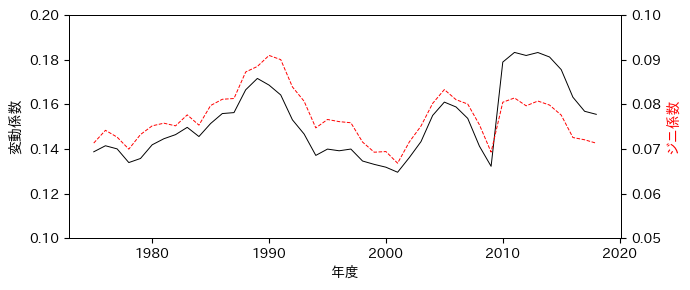

In [16]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xlabel('年度')

# 1人あたり県民所得の変動係数
ax.plot(PI.columns, PI.std()/PI.mean(), 'k', label='変動係数')
ax.set_ylim(0.1, 0.2)
ax.set_ylabel('変動係数')

# ジニ係数
ax2 = ax.twinx()
ax2.plot(PI.columns, np.array(G), 'r--', label='ジニ係数')
ax2.set_ylim(0.05, 0.1)
ax2.set_ylabel('ジニ係数', color='r')

#### STEP 5: Conclusion

- 格差を表す指標の40年間の推移から地域間で経済的な豊かさの格差が拡大したのかどうか考えよ．
- 格差を表す指標の40年間の推移を見ると，細かい時間スケールでの変動が見られる．これらは具体的にどのような出来事を反映していると考えられるか？